In [2]:
import numpy  as np
import pandas as pd

In [3]:
# Loading data
titanic = pd.read_csv('titanic_data.csv')

In [5]:
def count_passenger(df):
    
    return len(df)

def remove_column(df, key):
    
    new_df = df.copy()
    
    return new_df.drop(key, axis=1)

def had_family(df):
        
    if df > 0:
        return 'With family'
    else:
        return 'Alone'
    
def had_alive(df):
        
    if df > 0:
        return "alive"
    else:
        return "died"
    
def had_class(df):
    
    if df == 1:
        return 'First'
    elif df == 2 :
        return 'Second'
    else:
        return 'Third'
    
    
def had_child(passenger):
    
    age, sex = passenger

    if age <= 15:
        return 'Child'
    else:
        return sex

In [8]:
# find all the unique values for "Age"
print(titanic['Age'].unique())

[ 22.    38.    26.    35.    28.    54.     2.    27.    14.     4.    58.
  20.    39.    55.    31.    34.    15.     8.    19.    40.    66.    42.
  21.    18.     3.     7.    49.    29.    65.    28.5    5.    11.    45.
  17.    32.    16.    25.     0.83  30.    33.    23.    24.    46.    59.
  71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5   51.    55.5
  40.5   44.     1.    61.    56.    50.    36.    45.5   20.5   62.    41.
  52.    63.    23.5    0.92  43.    60.    10.    64.    13.    48.     0.75
  53.    57.    80.    70.    24.5    6.     0.67  30.5    0.42  34.5   74.  ]


In [9]:
# fill missing "Age" with mean
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())


In [10]:
# find all the unique values for "Embarked"
print titanic['Embarked'].unique()

['S' 'C' 'Q' nan]


In [11]:
# replace all the missing values in the Embarked column with S.
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [12]:
# find all the unique values for "Cabin"
print titanic['Cabin'].unique()

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']


In [13]:
# loop through rows in datafram and fill Cabin
for i, row in titanic.iterrows():
    if pd.isnull(row['Cabin']):
        continue
    else:
        for j, row in titanic.iterrows():
            if pd.isnull(titanic.loc[j,'Cabin']):
                if titanic.loc[j,'Ticket'] == titanic.loc[i,'Ticket']:
                    titanic.loc[j,'Cabin'] = titanic.loc[i,'Cabin']
                    break

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [30]:
# add "Passenger" column represent who alive or died
titanic['Passenger'] = map(had_alive, titanic['Survived'])

# add "Gender" column these map Sex from text to number for future analysis
titanic['Gender'] = titanic['Sex'].map({'female' : 0, 'male' : 1}).astype(int)
                           
# add "Who" column, to categorize passenger by group of male, female 
# and children as who under 15 as a child, 
titanic['Who'] = titanic[['Age','Sex']].apply(had_child, axis=1)
                           
# add "Port" column these map each embarktation from text to number for future analysis
titanic['Port'] = titanic['Embarked'].dropna().map({'C' : 0, 'Q' : 1, 'S': 2 }).astype(int)

# add "Class" column represen clss of each passenger
titanic['Class'] = map(had_class, titanic['Pclass'])                           
                        
# add "Family" column to represent passenger who travel alone or with their family
titanic['Family'] = map(had_family, titanic['Parch'] + titanic['SibSp'])

# drop "Parch" & "SibSp"
titanic = remove_column(titanic, ['Parch', 'SibSp'])                           
                           

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Passenger,Gender,Who,Port,Class,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,NaN,S,died,1,male,2,Third,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C85,C,alive,0,female,0,First,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,NaN,S,alive,0,female,2,Third,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C123,S,alive,0,female,2,First,With family
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,NaN,S,died,1,male,2,Third,Alone


In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from pandas.tools.plotting import scatter_matrix

sns.set(style="white")

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Who
Child      83
female    271
male      537
Name: Passenger, dtype: int64


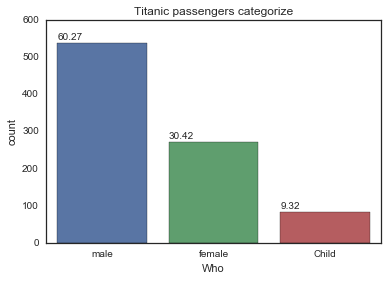

In [34]:
passengercount = float(len(titanic))

# Investigate who were the passenger

passenger_by_who = titanic.groupby('Who')
print passenger_by_who.count()['Passenger']
sns.plt.title('Titanic passengers categorize')
ax = sns.countplot(x = 'Who', data = titanic)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 10, '%1.2f'%((height*100)/passengercount))

Who     Class 
Child   First       6
        Second     19
        Third      58
female  First      91
        Second     66
        Third     114
male    First     119
        Second     99
        Third     319
Name: Passenger, dtype: int64


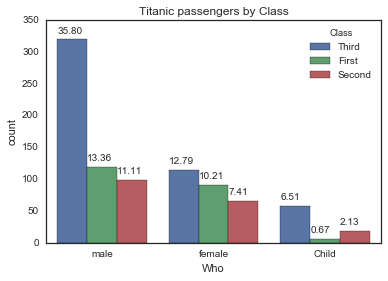

In [35]:
# Investigate passengers by class

# show passenger count
passenger_by_who_class = titanic.groupby(['Who','Class'])
print passenger_by_who_class.count()['Passenger']

# set plot title
ax = sns.plt.title('Titanic passengers by Class')

# show the counts of passengers
ax = sns.countplot(x = 'Who', hue = 'Class', data = titanic)

# add percentage for each group
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 10, '%1.2f'%((height*100)/passengercount))


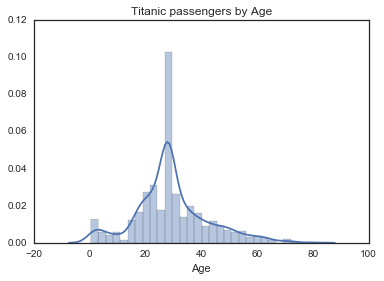

In [36]:
# quick look the age distribution
ax = sns.distplot(titanic['Age'], hist = True)
ax = sns.plt.title('Titanic passengers by Age')

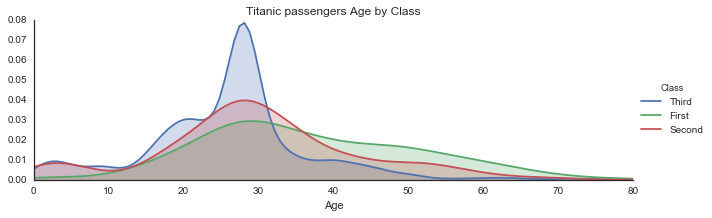

In [37]:
# check age for passengers by class

ax = sns.FacetGrid(titanic, hue = 'Class', aspect = 3)
ax.map(sns.kdeplot,'Age',shade = True)
oldest = titanic['Age'].max()
ax.set(xlim=(0,oldest))
ax.add_legend();
ax = sns.plt.title('Titanic passengers Age by Class')

Embarked
Cherbourg      168
Queenstown      77
Southampton    646
Name: Passenger, dtype: int64


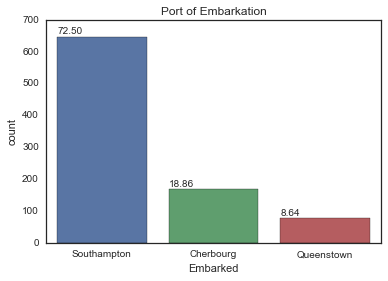

In [39]:
# Check passengers who from
titanic['Embarked'] = titanic['Embarked'].dropna().map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S': 'Southampton' })
passenger_by_embark_who = titanic.groupby('Embarked')

print passenger_by_embark_who.count()['Passenger']
ax = sns.plt.title('Port of Embarkation')
ax = sns.countplot(x = 'Embarked', data = titanic)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 10, '%1.2f'%((height*100)/passengercount))

Passenger
alive    342
died     549
Name: Survived, dtype: int64


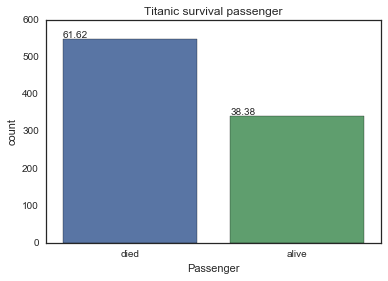

In [40]:
# check survial rate
passenger_by_class_who = titanic.groupby('Passenger')
print passenger_by_class_who.count()['Survived']
ax = sns.plt.title('Titanic survival passenger')
ax = sns.countplot(x = 'Passenger', data = titanic)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height + 2, '%1.2f'%((height*100)/passengercount))

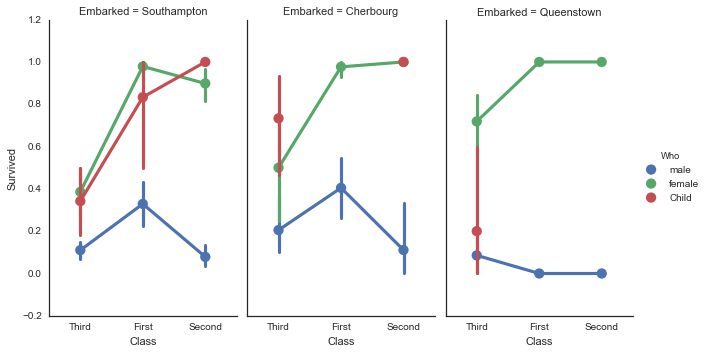

In [41]:
# plot survival probability against several variables
ax = sns.factorplot(x = 'Class', y = 'Survived', 
                   hue = 'Who', col = 'Embarked',
                   data = titanic, size = 5, aspect = .6)

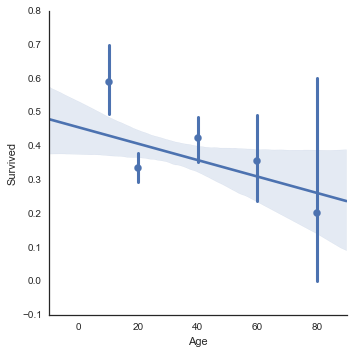

In [42]:
# set range of age for linear plot
age_range = [10,20,40,60,80]

ax = sns.lmplot('Age','Survived',
               data = titanic, palette = 'winter', 
               x_bins = age_range)

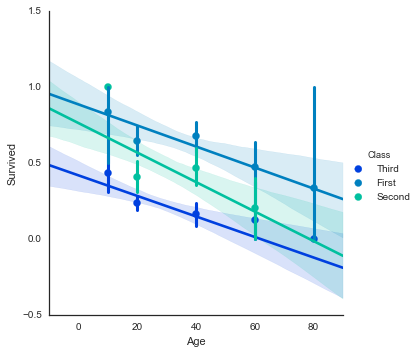

In [43]:
# how about survival rate if relate class and age
ax = sns.lmplot('Age', 'Survived', hue ='Class', 
               data = titanic, palette = 'winter', 
               x_bins = age_range)

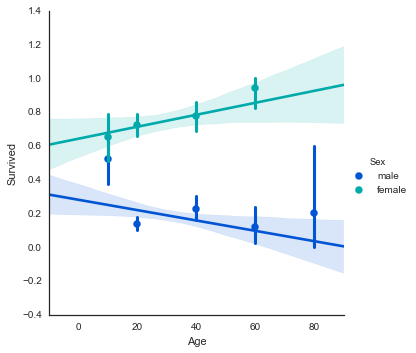

In [44]:
# how about if relate gender and age effect survival rate
ax = sns.lmplot('Age', 'Survived', hue = 'Sex', 
               data = titanic, palette = 'winter', 
               x_bins = age_range)

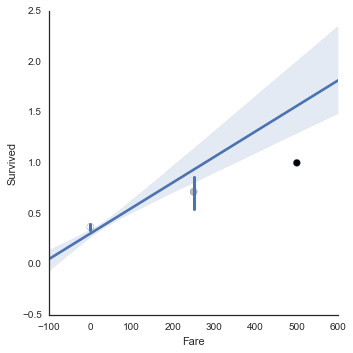

In [46]:
# set range of price
farerange = [0,250,500,750,1000]
ax = sns.lmplot('Fare', 'Survived', data = titanic, 
               palette = 'winter', x_bins = farerange)

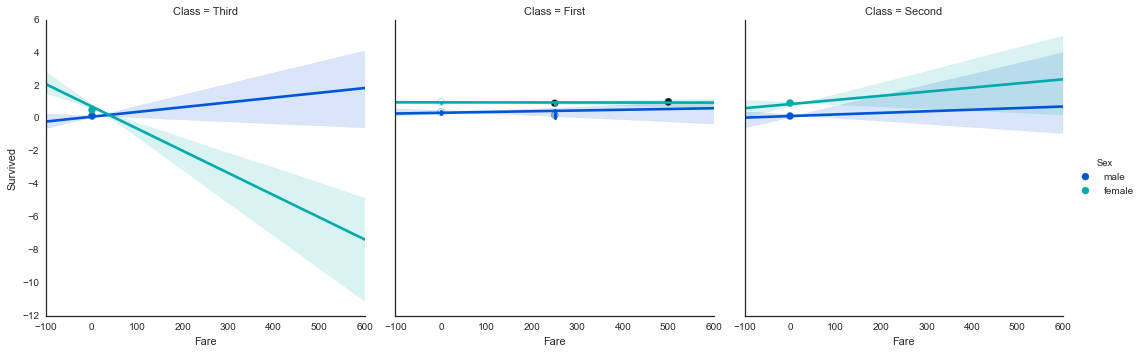

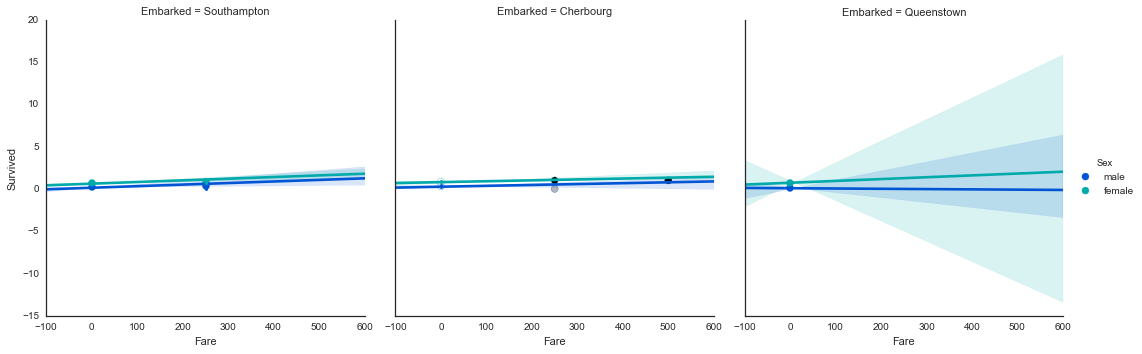

In [47]:
# check survived rate relate fare by gender
ax = sns.lmplot('Fare', 'Survived', hue = 'Sex',  col = 'Class',
               data = titanic, palette = 'winter', 
               x_bins = farerange)
ax = sns.lmplot('Fare', 'Survived', hue = 'Sex',  col = 'Embarked',
               data = titanic, palette = 'winter', 
               x_bins = farerange)